In [1]:
function forward_diff(f, x, dx)
    fx = f(x)
    fxph = f(x + dx)
    return (fxph - fx) / dx
end

forward_diff (generic function with 1 method)

In [2]:
function backward_diff(f, x, dx)
    fx = f(x)
    fxnh = f(x - dx)
    return (fx - fxnh) / dx
end

backward_diff (generic function with 1 method)

In [3]:
function central_diff(f, x, dx)
    fxph = f(x + dx)
    fxnh = f(x - dx)
    return (fxph - fxnh) / (2 * dx)
end

central_diff (generic function with 1 method)

In [4]:
function solve_problem(x)
    return -0.1*(x^4)-0.15*(x^3)-0.5*(x^2)-0.25*(x)+1.2
end

solve_problem (generic function with 1 method)

In [5]:
function solve_problemDiff(x)
    return -0.4*(x^3)-0.45*(x^2)-1*(x)-0.25
end

solve_problemDiff (generic function with 1 method)

In [6]:
fd=forward_diff(solve_problem, 0.5, 0.5)

-1.45

In [7]:
cd=central_diff(solve_problem, 0.5, 0.5)

-1.0

In [8]:
bd=backward_diff(solve_problem, 0.5, 0.5)

-0.55

In [9]:
exact=solve_problemDiff(0.5)

-0.9125

In [10]:
using Printf

println("\tForward differencing\t\t Central differencing\t\t Banckward differencing")
@printf("%10g (error=%10.2g)\t%10g (error=%10.2g)\t%10g (error=%10.2g)",
    fd, abs(fd - exact),
    cd, abs(cd - exact),
    bd, abs(bd - exact))

	Forward differencing		 Central differencing		 Banckward differencing
     -1.45 (error=      0.54)	        -1 (error=     0.088)	     -0.55 (error=      0.36)

In [11]:
println("\tForward differencing\t\t Central differencing\t\t Banckward differencing")

# We're going to store all the values for plotting,
# initialise variable for these

fd_errors = []
cd_errors = []
bd_errors = []
dx_all = []
dx = 0.5 # An initial mesh spacing

for i in 1:10
    fd = forward_diff(solve_problem, 0.5, dx)
    cd = central_diff(solve_problem, 0.5, dx)
    bd = backward_diff(solve_problem, 0.5, dx)
    @printf("%10g (error=%10.2g)\t%10g (error=%10.2g)\t%10g (error=%10.2g)\n",
        fd, abs(fd - exact),
        cd, abs(cd - exact),
        bd, abs(bd - exact))
    # Store tge h and the errors
    append!(dx_all, dx)
    append!(fd_errors, abs(fd - exact))
    append!(cd_errors, abs(cd - exact))
    append!(bd_errors, abs(bd - exact))
    dx = dx / 2 # Halve h for the next iteration
end

	Forward differencing		 Central differencing		 Banckward differencing
     -1.45 (error=      0.54)	        -1 (error=     0.088)	     -0.55 (error=      0.36)
  -1.15469 (error=      0.24)	 -0.934375 (error=     0.022)	 -0.714063 (error=       0.2)
  -1.02754 (error=      0.12)	 -0.917969 (error=    0.0055)	 -0.808398 (error=       0.1)
 -0.968579 (error=     0.056)	 -0.913867 (error=    0.0014)	 -0.859155 (error=     0.053)
 -0.940189 (error=     0.028)	 -0.912842 (error=   0.00034)	 -0.885495 (error=     0.027)
 -0.926258 (error=     0.014)	 -0.912585 (error=   8.5e-05)	 -0.898913 (error=     0.014)
 -0.919357 (error=    0.0069)	 -0.912521 (error=   2.1e-05)	 -0.905685 (error=    0.0068)
 -0.915923 (error=    0.0034)	 -0.912505 (error=   5.3e-06)	 -0.909087 (error=    0.0034)
  -0.91421 (error=    0.0017)	 -0.912501 (error=   1.3e-06)	 -0.910792 (error=    0.0017)
 -0.913355 (error=   0.00085)	   -0.9125 (error=   3.3e-07)	 -0.911646 (error=   0.00085)


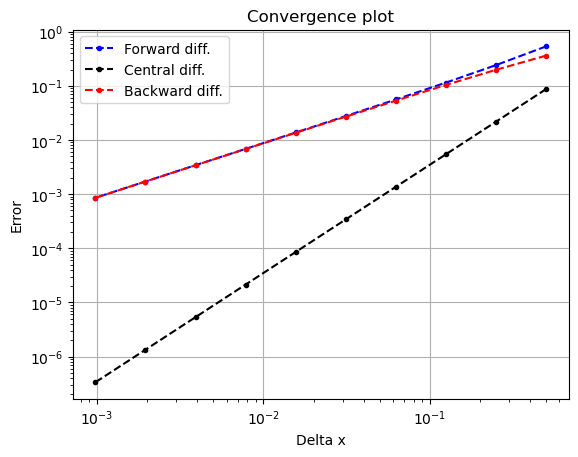

In [12]:
using PyPlot
n = length(dx_all)
loglog(dx_all, fd_errors, "b.--", label="Forward diff.")
loglog(dx_all, cd_errors, "k.--", label="Central diff.")
loglog(dx_all, bd_errors, "r.--", label="Backward diff.")

ylabel("Error")
xlabel("Delta x")

title("Convergence plot")

legend(loc="best")
grid(true)

In [13]:
println("\tForward differencing\t\t Central differencing\t\t Banckward differencing")

# We're going to store all the values for plotting,
# initialise variable for these

fd_errors = []
cd_errors = []
bd_errors = []
dx_all = []
dx = 1 # An initial mesh spacing

for i in 1:10
    fd = forward_diff(solve_problem, 1.25, dx)
    cd = central_diff(solve_problem, 1.25, dx)
    bd = backward_diff(solve_problem, 1.25, dx)
    @printf("%10g (error=%10.2g)\t%10g (error=%10.2g)\t%10g (error=%10.2g)\n",
        fd, abs(fd - exact),
        cd, abs(cd - exact),
        bd, abs(bd - exact))
    # Store tge h and the errors
    append!(dx_all, dx)
    append!(fd_errors, abs(fd - exact))
    append!(cd_errors, abs(cd - exact))
    append!(bd_errors, abs(bd - exact))
    dx = dx / 2 # Halve h for the next iteration
end

	Forward differencing		 Central differencing		 Banckward differencing
  -5.73438 (error=       4.8)	  -3.63437 (error=       2.7)	  -1.53438 (error=      0.62)
  -4.15938 (error=       3.2)	  -3.14688 (error=       2.2)	  -2.13437 (error=       1.2)
  -3.52656 (error=       2.6)	    -3.025 (error=       2.1)	  -2.52344 (error=       1.6)
  -3.24473 (error=       2.3)	  -2.99453 (error=       2.1)	  -2.74434 (error=       1.8)
  -3.11194 (error=       2.2)	  -2.98691 (error=       2.1)	  -2.86189 (error=       1.9)
  -3.04751 (error=       2.1)	  -2.98501 (error=       2.1)	  -2.92251 (error=         2)
  -3.01578 (error=       2.1)	  -2.98453 (error=       2.1)	  -2.95328 (error=         2)
  -3.00004 (error=       2.1)	  -2.98441 (error=       2.1)	  -2.96879 (error=       2.1)
   -2.9922 (error=       2.1)	  -2.98438 (error=       2.1)	  -2.97657 (error=       2.1)
  -2.98828 (error=       2.1)	  -2.98438 (error=       2.1)	  -2.98047 (error=       2.1)


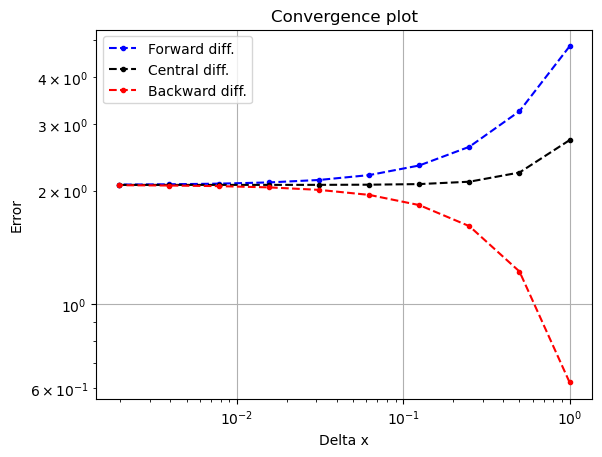

In [14]:
using PyPlot
n = length(dx_all)
loglog(dx_all, fd_errors, "b.--", label="Forward diff.")
loglog(dx_all, cd_errors, "k.--", label="Central diff.")
loglog(dx_all, bd_errors, "r.--", label="Backward diff.")

ylabel("Error")
xlabel("Delta x")

title("Convergence plot")

legend(loc="best")
grid(true)